In [1]:
import cv2
import numpy as np
 
def drawMatchesKnn_cv2(img1_gray,kp1,img2_gray,kp2,goodMatch):
    h1, w1 = img1_gray.shape[:2]
    h2, w2 = img2_gray.shape[:2]
 
    vis = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
    vis[:h1, :w1] = img1_gray
    vis[:h2, w1:w1 + w2] = img2_gray
 
    p1 = [kpp.queryIdx for kpp in goodMatch]
    p2 = [kpp.trainIdx for kpp in goodMatch]
 
    post1 = np.int32([kp1[pp].pt for pp in p1])
    post2 = np.int32([kp2[pp].pt for pp in p2]) + (w1, 0)
 
    for (x1, y1), (x2, y2) in zip(post1, post2):
        cv2.line(vis, (x1, y1), (x2, y2), (0,0,255))
    cv2.namedWindow("match",cv2.WINDOW_NORMAL)
    cv2.imshow("match", vis)
    
img1_gray = cv2.imread("/media/tencent/Seagate/walk_already/HS20120510691/5.walk_pic/000000000001.png")
img2_gray = cv2.imread("/media/tencent/Seagate/walk_already/HS20120510691/5.walk_pic/000000000002.png")
 
sift = cv2.SIFT()
#sift = cv2.SURF()
 
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)
 
# BFmatcher with default parms
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k = 2)
 
goodMatch = []
for m,n in matches:
    if m.distance < 0.50*n.distance:
        goodMatch.append(m)
        
drawMatchesKnn_cv2(img1_gray,kp1,img2_gray,kp2,goodMatch[:20])
 
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'module' object has no attribute 'SIFT'

cv version:  3.1.0


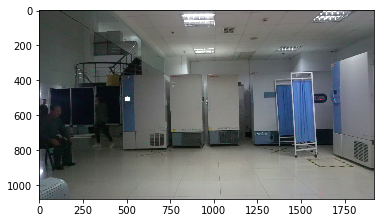

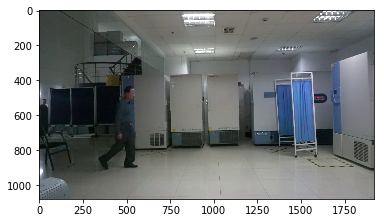

sift detector......
('des1 length:', 500)
('des2 length:', 500)
('kp1 length:', 500)
('kp2 length:', 500)


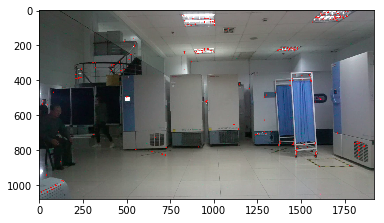

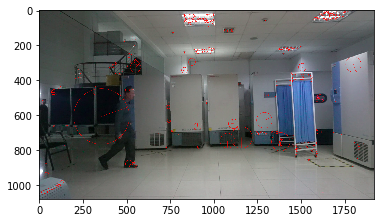

(1611.10302734375, 21.473041534423828)


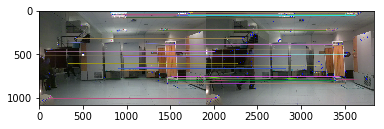

In [10]:
%matplotlib inline
# coding: utf-8
from matplotlib import pyplot as plt
#from lake.decorator import time_cost
import cv2
print 'cv version: ', cv2.__version__


def bgr_rgb(img):
    (r, g, b) = cv2.split(img)
    return cv2.merge([b, g, r])


def orb_detect(image_a, image_b):
    # feature match
    orb = cv2.ORB_create()
    
    kp1, des1 = orb.detectAndCompute(image_a, None)
    kp2, des2 = orb.detectAndCompute(image_b, None)

    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors.
    matches = bf.match(des1, des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 10 matches.
    img3 = cv2.drawMatches(image_a, kp1, image_b, kp2, matches[:100], None, flags=2)

    return bgr_rgb(img3)


def sift_detect(img1, img2, detector='surf'):
    if detector.startswith('si'):
        print "sift detector......"
        sift = cv2.xfeatures2d.SIFT_create(500)
    else:
        print "surf detector......"
        sift = cv2.xfeatures2d.SURF_create(500)

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    print("des1 length:",len(des1))
    print("des2 length:",len(des2))
    print("kp1 length:",len(kp1))
    print("kp2 length:",len(kp2))
    '''
    extract_kp = []
    for i in range(len(kp1)):
        if kp1[i].pt[0] > 1800:
            extract_kp.append(kp1[i])
    '''
    #draw keypoints
    img_kp1 = cv2.drawKeypoints(img1,kp1,img1,(255,0,0))
    img_kp2 = cv2.drawKeypoints(img2,kp2,img2,(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(img_kp1)
    plt.show()
    plt.imshow(img_kp2)
    plt.show()
    print(kp1[0].pt)
    
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test
    good = [[m] for m, n in matches if m.distance < 0.5 * n.distance]

    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)

    return bgr_rgb(img3)


if __name__ == "__main__":
    # load image
    image_a = cv2.imread('/media/tencent/Seagate/walk_already/HS20120510691/5.walk_pic/000000000001.png')
    image_b = cv2.imread('/media/tencent/Seagate/walk_already/HS20120510691/5.walk_pic/000000000100.png')
    image_a = bgr_rgb(image_a)
    image_b = bgr_rgb(image_b)
    plt.imshow(image_a)
    plt.show()
    plt.imshow(image_b)
    plt.show()
    # ORB
   # img = orb_detect(image_a, image_b)

    # SIFT or SURF
    img = sift_detect(image_a, image_b,"sift")

    plt.imshow(img)
    plt.show()

In [7]:
??  cv2.xfeatures2d.SIFT_create()